Load the annotation

In [1]:
import pandas as pd
import numpy as np


In [5]:
path = "Research-Data/tvsum/ydata-tvsum50-v1_1/data/ydata-tvsum50-anno.tsv"
df = pd.read_table(path, header=None)
df.head()

,0,1,2
0,AwmHb44_ouw,VT,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
1,AwmHb44_ouw,VT,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
2,AwmHb44_ouw,VT,"3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,..."
3,AwmHb44_ouw,VT,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
4,AwmHb44_ouw,VT,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."


Get the average of given video and create a new dataframe

In [39]:
video = "byxOvuiIJV0"
target_rows = []

for index, row in df.iterrows():
    if video == row[0]:
        row_list = [int(i) for i in row[2].split(",")]
        target_rows.append(row_list)

print(len(target_rows[0])) # 48 per 2 seconds 
numpy_version = np.array(target_rows)
numpy_version = np.mean(numpy_version, axis=0)
print(numpy_version)

3705
[2.15 2.15 2.15 ... 1.6  1.6  1.6 ]


Plot the average significance scores

3705
3705


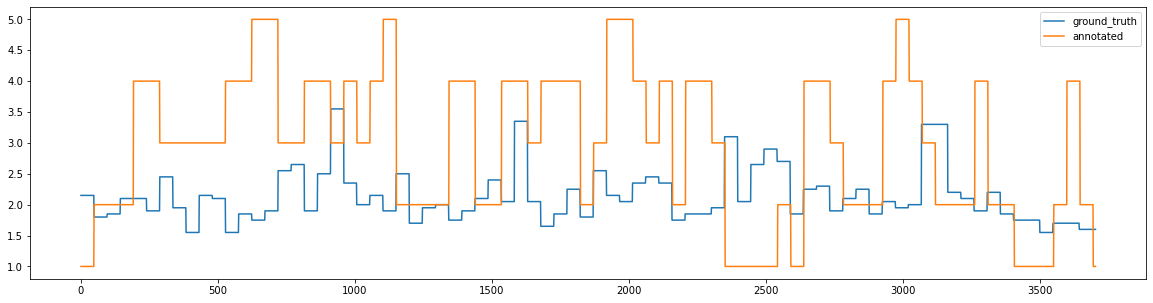

PearsonRResult(statistic=-0.0860466271372819, pvalue=1.5585000903297588e-07)

In [43]:
from matplotlib import pyplot as plt
from scipy import stats

x = np.arange(0, len(numpy_version))
plt.figure(figsize=(20,5))
plt.plot(x, numpy_version, label="ground_truth")
my_annot = [1, 2, 2, 2, 4, 4, 3, 3, 3, 3, 3, 4, 4, 5, 5, 3, 3, 4, 4, 3, 4, 3, 4, 5, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 3, 4, 4, 4, 2, 3, 5, 5, 4, 3, 4, 2, 4, 4, 3, 1, 1, 1, 1, 2, 1, 4, 4, 3, 2, 2, 2, 4, 5, 4, 3, 2, 2, 2, 4, 2, 2, 1, 1, 1, 2, 4, 2, 1]
my_annot = np.repeat(my_annot, 48)
my_annot = my_annot[:len(numpy_version)]
x = np.arange(0, len(my_annot))
plt.plot(x, my_annot, label="annotated")
print(len(my_annot))
print(len(numpy_version))
plt.legend()
plt.show()

stats.pearsonr(numpy_version, my_annot)